In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/data/Fluo4/8-18-16/fluo4-ca-test

/Users/austinmcdonald/Desktop/data/Fluo4/8-18-16/fluo4-ca-test


In [3]:
os.listdir()

['.DS_Store',
 'ca-00.csv',
 'ca-01.csv',
 'ca-02.csv',
 'ca-03.csv',
 'ca-04.csv',
 'ca-05.csv',
 'ca-06.csv',
 'ca-07.csv',
 'ca-08.csv',
 'ca-09.csv',
 'ca-10.csv',
 'ca-11.csv',
 'ca-12.csv',
 'ca-13.csv',
 'ca-20.csv',
 'CCD-noise.csv',
 'water.csv']

In [4]:
datass = None
datass = []
for files in glob.glob("*.csv"):
    datass.append(files)
Cadat = datass[0:15]

In [5]:
data = dict()
dataf= dict()
datacut = dict()
intensity = dict()
leng = len(Cadat)
backg = pd.read_csv('CCD-noise.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
water = pd.read_csv('water.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
for x in range(0,leng):
    data[x] = pd.read_csv(Cadat[x],delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
    data[x]['dif'] = data[x]['sig'].diff().abs()
    data[x]['BS'] = (data[x]['sig']-backg['sig'])
    dataf[x] = data[x][data[x]['dif']<.02]
    datacut[x] = dataf[x][(dataf[x]['wave']>490) & (dataf[x]['wave']<700)]
    intensity[x] = integrate.trapz(datacut[x]['BS'], datacut[x]['wave'])



In [6]:
intensity[10]/intensity[0]

291.83334666257571

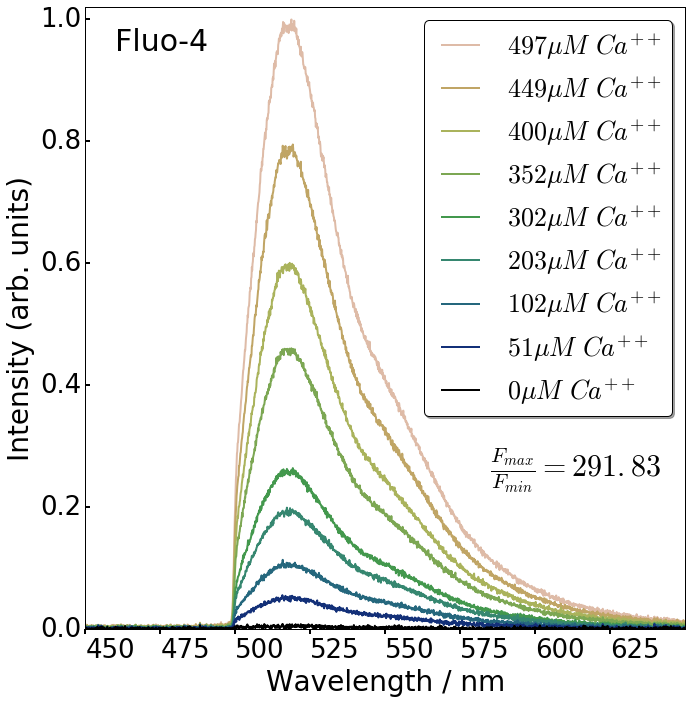

In [7]:
plt.figure(figsize=(10,10))
nor = max(dataf[10]['BS'])

plt.plot(dataf[10]['wave'],dataf[10]['BS']/nor,color=cm.gist_earth(80/90),label= r'$497 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[9]['wave'],dataf[9]['BS']/nor,color=cm.gist_earth(70/90),label= r'$449 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[8]['wave'],dataf[8]['BS']/nor,color=cm.gist_earth(60/90),label= r'$400 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[7]['wave'],dataf[7]['BS']/nor,color=cm.gist_earth(50/90),label= r'$352 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[6]['wave'],dataf[6]['BS']/nor,color=cm.gist_earth(40/90),label= r'$302 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[4]['wave'],dataf[4]['BS']/nor,color=cm.gist_earth(30/90),label= r'$203 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[2]['wave'],dataf[2]['BS']/nor,color=cm.gist_earth(20/90),label= r'$102 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[1]['wave'],dataf[1]['BS']/nor,color=cm.gist_earth(10/90),label= r'$51 \mu M$'+' $Ca^{++}$',linewidth=2)
plt.plot(dataf[0]['wave'],dataf[0]['BS']/nor,color=cm.gist_earth(0/90),label= r'$0 \mu M$'+' $Ca^{++}$',linewidth=2)

plt.text(460, .95, 'Fluo-4', fontsize=30)
plt.text(585, .25, r'$\frac{F_{max}}{F_{min}} = 291.83$', fontsize=30)
plt.xlabel(r'Wavelength / nm', fontsize=28)
plt.ylabel('Intensity (arb. units)', fontsize=28)
#plt.title('Fluo-4 Calicum Induced Fluorescence', fontsize=32)
plt.legend(loc='upper right',fontsize=26,shadow=True, fancybox=True)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xticks([450,475,500,525,550,575,600,625],ha='left')
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='out',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(450,650)
plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/Ar_Fluo4_ca_IF.pdf')
plt.show()

(490, 600)

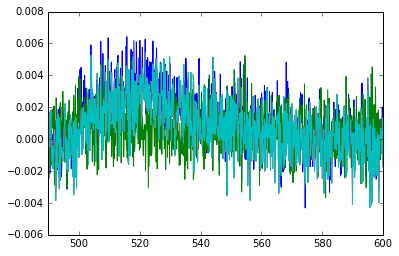

In [9]:
plt.plot(data[0]['wave'],data[0]['sig']-backg['sig'])
plt.plot(water['wave'],water['sig']-backg['sig'])
plt.plot(dataf[0]['wave'],dataf[0]['BS'])
plt.plot(data[0]['wave'],data[0]['sig']-water['sig'])

plt.xlim(490,600)

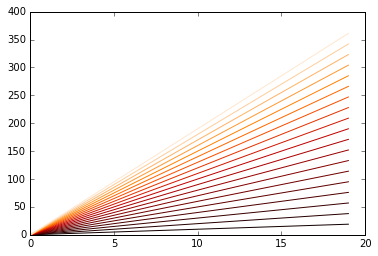

In [8]:
a = np.arange(0,20)

plt.figure()
for i in np.arange(20):
    c = cm.gist_heat(i/20)
    plt.plot(a,i*a,color=c)

plt.show()

In [20]:
inte = []
for a in range(0,15):
    inte.append(intensity[a])
inte
Fmax=max(inte)
Fmin=min(inte)
Fs = np.array((inte-Fmin)/(Fmax-inte))
Fs

array([  0.00000000e+00,   5.06072456e-02,   1.16193286e-01,
         1.54538356e-01,   2.38377103e-01,   3.52544804e-01,
         3.46557758e-01,   8.51713627e-01,   1.48806385e+00,
         3.82978325e+00,              inf,   1.11160860e+02,
         9.60963104e+01,   9.18612115e+01,   1.87979694e+01])

In [21]:
inte

[0.1297932567205613,
 1.9481062407954171,
 4.059299270235722,
 5.1825018629016375,
 7.3960034064682914,
 9.9689751271835654,
 9.8448864068151654,
 17.492446975743839,
 22.706280816466329,
 30.062285935065912,
 37.878000482996249,
 37.541446293433317,
 37.489229714327898,
 37.471499139756801,
 35.971329835350573]

In [33]:
xes = list(range(15))
bacon = []
for f in range(len(xes)):
    bacon.append((6.43e-3)*(4e-6)/(500e-6+(4e-6*xes[f])))
finalcon=np.array(np.cumsum(bacon)/1e-6)
finalcon = np.append(0,finalcon)
finalcon = finalcon[0:len(finalcon)-1]
finalcon

array([   0.        ,   51.44      ,  102.47174603,  153.10166729,
        203.33604229,  253.18100353,  302.64254199,  351.72651146,
        400.43863267,  448.78449733,  496.76957196,  544.39920159,
        591.67861335,  638.61291992,  685.20712282])

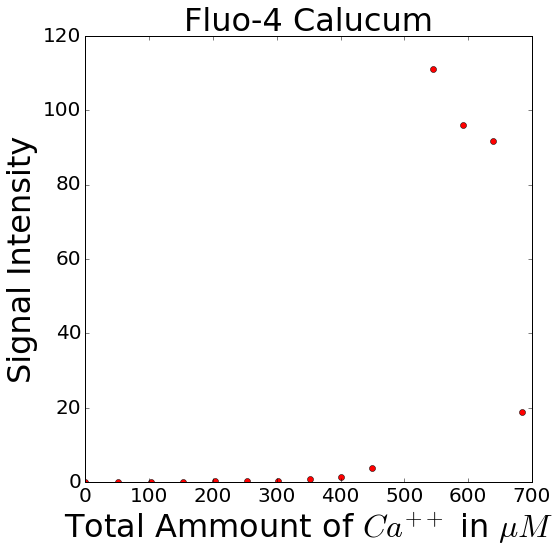

In [34]:
plt.figure(figsize=(8,8))
plt.plot(finalcon,Fs,'ro')
plt.xlabel(r'Total Ammount of $Ca^{++}$ in $\mu M$', fontsize=32)
plt.ylabel('Signal Intensity', fontsize=32)
plt.title('Fluo-4 Calucum', fontsize=32)
plt.tick_params(labelsize=20)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/Fluo4/Fluo4 Bakd.pdf')
plt.show()

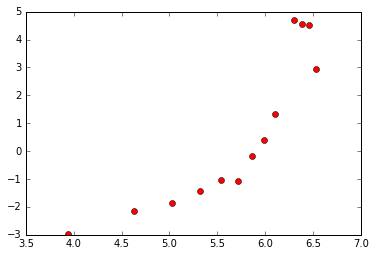

In [35]:
plt.plot(np.log(finalcon),np.log(Fs),'ro')

In [36]:
ys =np.log(Fs)
ys

array([       -inf, -2.98366052, -2.15250022, -1.86731295, -1.43390139,
       -1.04257756, -1.05970579, -0.16050493,  0.39747584,  1.34280821,
               inf,  4.71097834,  4.56535092,  4.52027887,  2.93374886])

In [56]:
ys =np.log(Fs)
ys = np.delete(ys,[0,10])
xs =np.log(finalcon)
xs = np.delete(xs,[0,10])
fit = np.polyfit(xs,ys,1)
fun = np.poly1d(fit)
kd = np.exp(fun[0])/1e-6
kd

0.050810870640516981

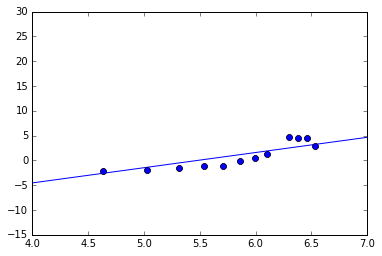

In [58]:
xvals = np.linspace(1.0, 15.0, num=500, endpoint=True)
plt.plot(xvals,(fun[1]*xvals+fun[0]))
plt.plot(np.log(finalcon),np.log(Fs),'ro')
plt.plot(xs,ys,'bo')

plt.xlim(4,7)
plt.show()

In [28]:
freeCa = kd*Fs
freeCa

array([  0.00000000e+00,   1.60197728e+00,   3.67810976e+00,
         4.89192669e+00,   7.54585037e+00,   1.11598401e+01,
         1.09703195e+01,   2.69610777e+01,   4.71048058e+01,
         1.21232161e+02,              inf,   3.51880782e+03,
         3.04193805e+03,   2.90787558e+03,   5.95051551e+02])

In [10]:

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))/(sig*np.sqrt(2*3.142))

[]

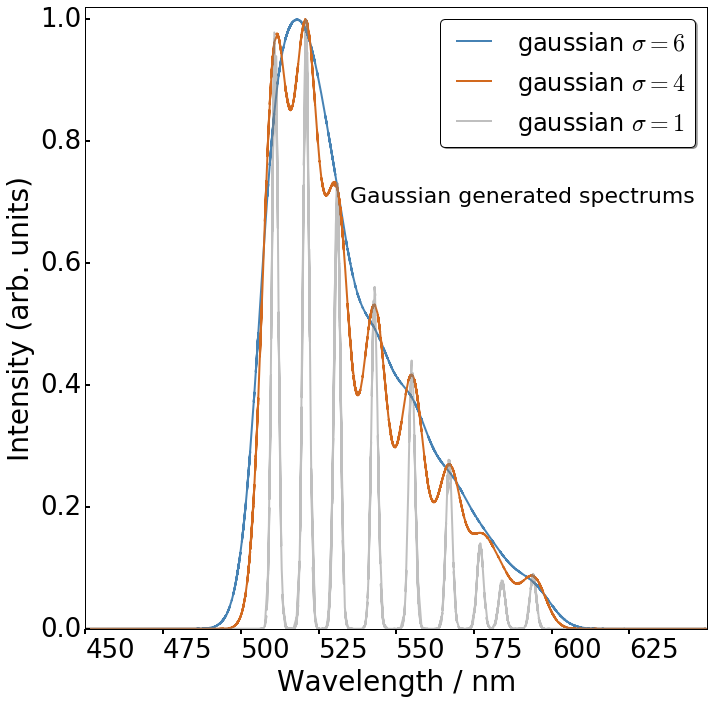

In [215]:
plt.figure(figsize=(10,10))
pure=np.arange(450,650,200/1722)
noise = np.random.normal(0, 0.4, 1722)
vars = pure + noise

G1 = gaussian(vars,511,6)
G2 = gaussian(vars,521,6)
G3 = 0.73*gaussian(vars,531,6)
G4 = 0.56*gaussian(vars,543,6)
G5 = 0.44*gaussian(vars,555,6)
G6 = 0.28*gaussian(vars,567,6)
G7 = 0.14*gaussian(vars,577,6)
G8 = 0.08*gaussian(vars,584,6)
G9 = 0.09*gaussian(vars,594,6)

plt.plot(vars,(G1+G2+G3+G4+G5+G6+G7+G8+G9)/(max(G1+G2+G3+G4+G5+G6+G7+G8+G9)),color='steelblue',linewidth=2, label = r'gaussian $\sigma = 6$')

sig = 4
G1 = gaussian(vars,511,sig)
G2 = gaussian(vars,521,sig)
G3 = 0.73*gaussian(vars,531,sig)
G4 = 0.56*gaussian(vars,543,sig)
G5 = 0.44*gaussian(vars,555,sig)
G6 = 0.28*gaussian(vars,567,sig)
G7 = 0.14*gaussian(vars,577,sig)
G8 = 0.08*gaussian(vars,584,sig)
G9 = 0.09*gaussian(vars,594,sig)

plt.plot(vars,(G1+G2+G3+G4+G5+G6+G7+G8+G9)/(max(G1+G2+G3+G4+G5+G6+G7+G8+G9)),color='chocolate',linewidth=2,label = r'gaussian $\sigma = 4$')

sig = 1
G1 = gaussian(vars,511,sig)
G2 = gaussian(vars,521,sig)
G3 = 0.73*gaussian(vars,531,sig)
G4 = 0.56*gaussian(vars,543,sig)
G5 = 0.44*gaussian(vars,555,sig)
G6 = 0.28*gaussian(vars,567,sig)
G7 = 0.14*gaussian(vars,577,sig)
G8 = 0.08*gaussian(vars,584,sig)
G9 = 0.09*gaussian(vars,594,sig)

plt.plot(vars,(G1+G2+G3+G4+G5+G6+G7+G8+G9)/(max(G1+G2+G3+G4+G5+G6+G7+G8+G9)),linewidth=2,label = r'gaussian $\sigma = 1$', alpha=0.5,color = 'grey')

plt.text(535, .7, 'Gaussian generated spectrums', fontsize=22)
plt.xlabel(r'Wavelength / nm', fontsize=28)
plt.ylabel('Intensity (arb. units)', fontsize=28)
#plt.title('Fluo-4 Calicum Induced Fluorescence', fontsize=32)
plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xticks([450,475,500,525,550,575,600,625],ha='left')
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='out',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(450,650)
plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/Argauspc.pdf')

plt.plot()

[]

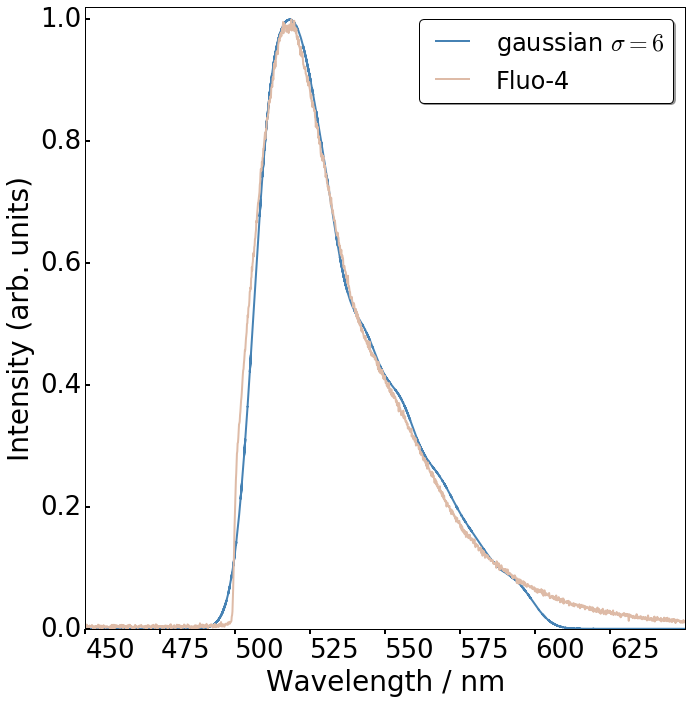

In [211]:
plt.figure(figsize=(10,10))
pure=np.arange(450,650,200/1722)
noise = np.random.normal(0, 0.4, 1722)
vars = pure + noise

G1 = gaussian(vars,511,6)
G2 = gaussian(vars,521,6)
G3 = 0.73*gaussian(vars,531,6)
G4 = 0.56*gaussian(vars,543,6)
G5 = 0.44*gaussian(vars,555,6)
G6 = 0.28*gaussian(vars,567,6)
G7 = 0.14*gaussian(vars,577,6)
G8 = 0.08*gaussian(vars,584,6)
G9 = 0.09*gaussian(vars,594,6)

plt.plot(vars,(G1+G2+G3+G4+G5+G6+G7+G8+G9)/(max(G1+G2+G3+G4+G5+G6+G7+G8+G9)),color='steelblue',linewidth=2, label = r'gaussian $\sigma = 6$')

plt.plot(dataf[10]['wave'],dataf[10]['BS']/nor,color=cm.gist_earth(80/90),label= 'Fluo-4',linewidth=2)

plt.xlabel(r'Wavelength / nm', fontsize=28)
plt.ylabel('Intensity (arb. units)', fontsize=28)
#plt.title('Fluo-4 Calicum Induced Fluorescence', fontsize=32)
plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xticks([450,475,500,525,550,575,600,625],ha='left')
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='out',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(450,650)
plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/Argaufluspc.pdf')

plt.plot()

In [150]:
pure = np.linspace(-1, 1, 100)
noise = np.random.normal(0, 1, 100)
signal = pure + noise

In [151]:
signal

array([-0.61785894, -2.53911013, -0.10560875, -1.3685596 , -1.99559469,
       -0.40408975, -1.15466124, -1.71759305, -2.41761893, -1.22731642,
       -1.05560197, -0.50893071, -0.44308375, -0.97233212, -1.88262313,
        0.72841685,  0.35874514,  0.02153099,  0.81472312, -0.81314153,
       -0.8945382 , -0.81467768, -0.83079554, -0.12449911, -1.63265726,
       -0.00982795, -0.09994862,  0.81168324,  0.14918184, -0.49168614,
       -0.33376463,  0.48811078, -0.6125594 , -0.108097  ,  1.02694497,
       -1.18924292, -0.15832609,  0.49172879,  0.63286007,  0.06449764,
        1.69487614, -1.77227311, -0.66675861,  0.90085293,  1.5815933 ,
       -0.46589238, -1.9602352 ,  0.76655226, -0.54843394, -1.16659317,
        1.31542009,  0.96460691,  0.03498314,  1.67306206,  0.23119538,
       -0.58517053, -0.09872161, -0.10780655,  0.40949358,  0.05510423,
       -0.31869065,  1.71585271,  3.19035529, -1.15825502,  0.56156923,
       -1.60703332,  0.60051997,  0.38193897, -0.38612166,  0.27

In [167]:
pure = np.linspace(-1, 1, 100)
noise = np.random.normal(0, 1, 100)
signal = pure + noise

In [166]:
len(vars)

1722

In [173]:
len(noise)

1722

In [175]:
sum(noise)

3.7532004709524349